In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve
import numpy as np

## Project 1: 1D FDTD Transmission through a slab

![q1_figure](./Project1_figure.png)

### (a) contruct a 1D (E_z, H_y) FDTD simulation as descibed above

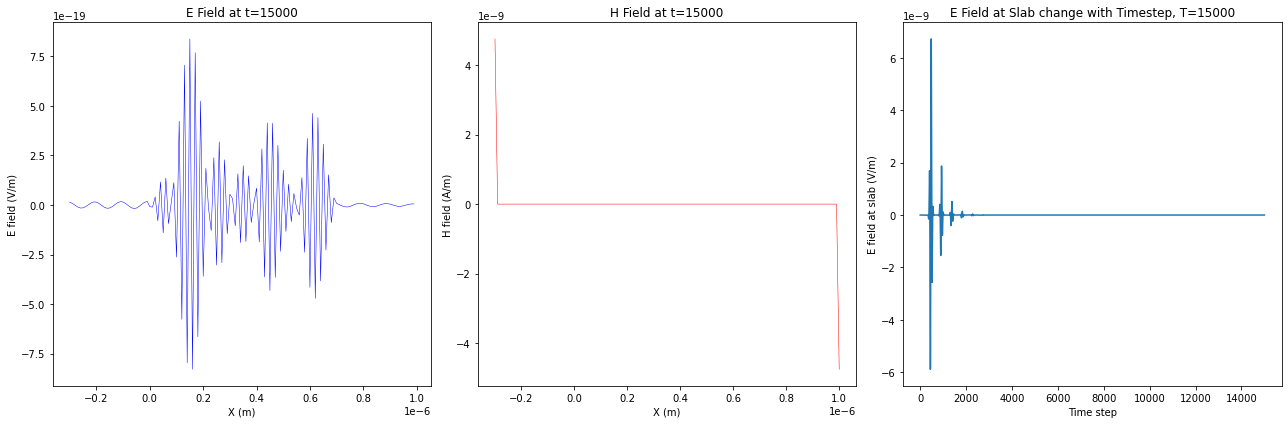

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
epsi0 = 1  # Permittivity of free space
epsislab = 10  # Permittivity of slab
mu0 = 1  # Permeability of free space
c0 = 1 / np.sqrt(epsi0 * mu0)  # Speed of light
dx = 1e-8  # Space step
dt = dx / c0  # Time step

# Domain definition
x = np.linspace(-30, 100, 131) * 1e-8   #nm
x_h = x[:-1]
epsi = np.ones(len(x)) * epsi0
epsi[(x >= 0) & (x <= 70e-8)] = epsislab
NCell_space = len(x) - 1

# Source parameters
lambda0 = 800e-9
lambdaL = 600e-9
lambdaU = 1000e-9
omega = 2 * np.pi * c0 / lambda0
sigma = 2 * lambda0 / (omega * (lambdaU - lambdaL))

# Time steps for recording
T_max = [15000]

# Initialize fields
Ez = np.zeros(NCell_space)
Hy = np.zeros(NCell_space + 1)
Eslab_record = np.zeros(T_max[0] + 1)

# Differential operators for FDTD
term_1 = (np.eye(NCell_space + 1, NCell_space, k=0) - np.eye(NCell_space + 1, NCell_space, k=-1))*dt/dx
term_2 = (np.eye(NCell_space, NCell_space + 1, k=1) - np.eye(NCell_space, NCell_space + 1, k=0))*dt/dx

for T in T_max:
    for t in range(1, T + 1):
        # Source
        J = np.zeros(NCell_space)
        J[np.argmin(np.abs(x + 200e-9))] = np.exp(-((t * dt - 4 * sigma) / sigma) ** 2) * np.sin(omega * t * dt)

        # Update Ez field with absorption boundary conditions preserved
        left, right = Ez[1], Ez[-2]
        Ez += np.matmul(term_2, Hy / epsi)
        Ez[0], Ez[-1] = left, right
        
        
        Eslab_record[t-1] = Ez[120]
        
        # Subtract the source term
        epsi_mul = 0.5*epsi[:-1]
        Ez -= dt * J / epsi_mul
        # Update Hy field
        Hy += np.matmul(term_1, Ez / mu0)

    # Plotting at the last time step
    plt.figure(figsize=(18, 6))
    plt.subplot(131)
    plt.plot(x_h, Ez, 'b', lw=0.5)
    plt.xlabel('X (m)')
    plt.ylabel('E field (V/m)')
    plt.title(f"E Field at t={T}")

    plt.subplot(132)
    plt.plot(x, Hy, 'r', lw=0.5)
    plt.xlabel('X (m)')
    plt.ylabel('H field (A/m)')
    plt.title(f"H Field at t={T}")

    plt.subplot(133)
    plt.plot(np.arange(0,len(Eslab_record)),Eslab_record)
    plt.xlabel('Time step')
    plt.ylabel('E field at slab (V/m)')
    plt.title(f"E Field at Slab change with Timestep, T={T}")
    plt.tight_layout()
    plt.show()


### (b) no slab

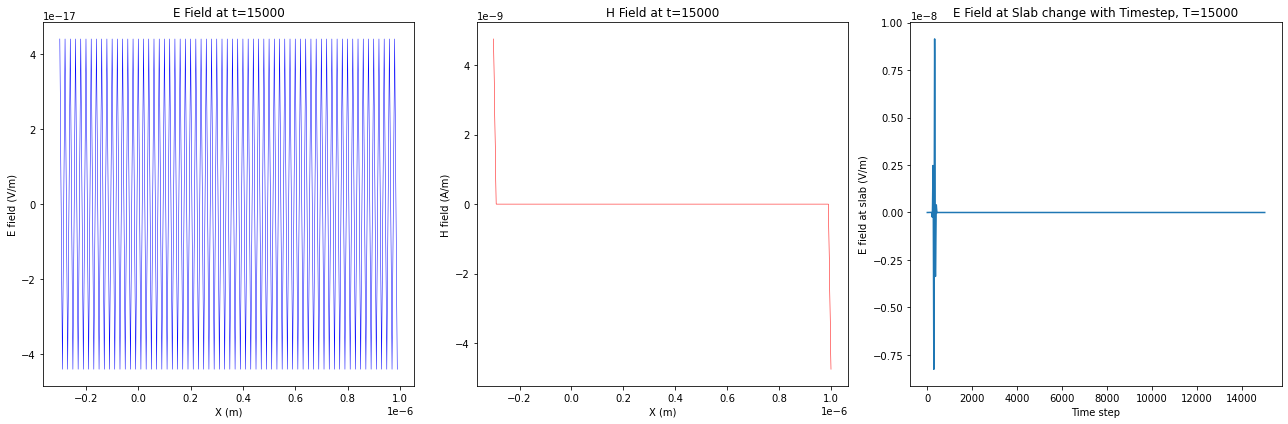

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
epsi0 = 1  # Permittivity of free space
epsislab = 10  # Permittivity of slab
mu0 = 1  # Permeability of free space
c0 = 1 / np.sqrt(epsi0 * mu0)  # Speed of light
dx = 1e-8  # Space step
dt = dx / c0  # Time step

# Domain definition
x = np.linspace(-30, 100, 131) * 1e-8   #nm
x_h = x[:-1]
epsi = np.ones(len(x)) * epsi0
#epsi[(x >= 0) & (x <= 70e-8)] = epsislab
NCell_space = len(x) - 1

# Source parameters
lambda0 = 800e-9
lambdaL = 600e-9
lambdaU = 1000e-9
omega = 2 * np.pi * c0 / lambda0
sigma = 2 * lambda0 / (omega * (lambdaU - lambdaL))

# Time steps for recording
T_max = [15000]

# Initialize fields
Ez = np.zeros(NCell_space)
Hy = np.zeros(NCell_space + 1)
Enoslab_record = np.zeros(T_max[0] + 1)

# Differential operators for FDTD
term_1 = (np.eye(NCell_space + 1, NCell_space, k=0) - np.eye(NCell_space + 1, NCell_space, k=-1))*dt/dx
term_2 = (np.eye(NCell_space, NCell_space + 1, k=1) - np.eye(NCell_space, NCell_space + 1, k=0))*dt/dx

for T in T_max:
    for t in range(1, T + 1):
        # Source
        J = np.zeros(NCell_space)
        J[np.argmin(np.abs(x + 200e-9))] = np.exp(-((t * dt - 4 * sigma) / sigma) ** 2) * np.sin(omega * t * dt)

        # Update Ez field with absorption boundary conditions preserved
        left, right = Ez[1], Ez[-2]
        Ez += np.matmul(term_2, Hy / epsi)
        Ez[0], Ez[-1] = left, right
        
        
        Enoslab_record[t-1] = Ez[120]
        
        # Subtract the source term
        epsi_mul = 0.5*epsi[:-1]
        Ez -= dt * J / epsi_mul
        # Update Hy field
        Hy += np.matmul(term_1, Ez / mu0)

    # Plotting at the last time step
    plt.figure(figsize=(18, 6))
    plt.subplot(131)
    plt.plot(x_h, Ez, 'b', lw=0.5)
    plt.xlabel('X (m)')
    plt.ylabel('E field (V/m)')
    plt.title(f"E Field at t={T}")

    plt.subplot(132)
    plt.plot(x, Hy, 'r', lw=0.5)
    plt.xlabel('X (m)')
    plt.ylabel('H field (A/m)')
    plt.title(f"H Field at t={T}")

    plt.subplot(133)
    plt.plot(np.arange(0,len(Enoslab_record)),Enoslab_record)
    plt.xlabel('Time step')
    plt.ylabel('E field at slab (V/m)')
    plt.title(f"E Field at Slab change with Timestep, T={T}")
    plt.tight_layout()
    plt.show()


### (c) FFT respect to $\lambda$

Text(0.5, 1.0, 'E_no slab spectrum')

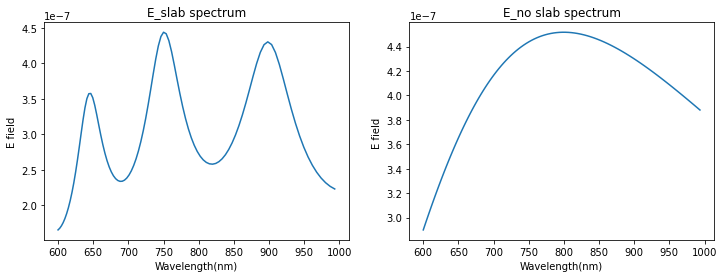

In [4]:
Efreslab=abs(np.fft.fft(Eslab_record))
Efrenoslab=abs(np.fft.fft(Enoslab_record))
 
freq = np.fft.fftfreq(len(Eslab_record), dt)

#sampling positive
Efreslabplus=(Efreslab[freq>=0])
Efrenoslabplus=(Efrenoslab[freq>=0])
freqplus =freq[freq>=0]


wavelength = c0*1e9/freqplus[1:]
wavelength = np.append(1,wavelength)

Ewaveslab=Efreslabplus[(wavelength>=600) & (wavelength<=1000)]
Ewavenoslab=Efrenoslabplus[(wavelength>=600) & (wavelength<=1000)]
waveplus=wavelength[(wavelength>=600) & (wavelength<=1000)]
# Efpos=np.abs(Ef[freq>=0])


plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(waveplus,Ewaveslab)
plt.xlabel("Wavelength(nm)")
plt.ylabel("E field")
plt.title("E_slab spectrum")
# plt.figure()
plt.subplot(122)
plt.plot(waveplus,Ewavenoslab)
plt.xlabel("Wavelength(nm)")
plt.ylabel("E field ")
plt.title("E_no slab spectrum")

### (d) Comparing with theoretical results

![Theoretical result](./Theoretical_result_in_1D.png)

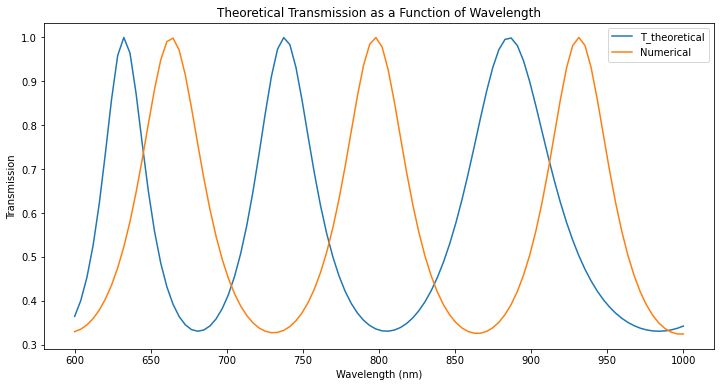

In [5]:
dev = Ewaveslab/Ewavenoslab
T = np.abs(dev)*np.abs(dev)

d = 700e-9
# Define the theoretical function
def T_theoretical(lamb, epsi_slab, d):
    epsi_slab = epsislab  # This should be the relative permittivity of the slab
    part1 = (np.sqrt(epsislab) - 1)**2
    part2 = (np.sqrt(epsislab) + 1)**2
    exponent = 1j * (4 * np.pi * d / lamb) * np.sqrt(epsi_slab)
    T = (16 * epsi_slab) / (np.abs(part1 - part2 * np.exp(exponent)) ** 2)
    return T

# Assuming some dummy variables for the purpose of plotting
# These values should come from your actual problem context
epsilon_slab = 2.25  # Example value for epsilon_slab

# Define a range of wavelengths to plot over
lambdas = np.linspace(600e-9, 1000e-9, len(T))  # Wavelength range from 400 nm to 800 nm

# Calculate the theoretical transmission
T_vals = T_theoretical(lambdas, epsislab, d)

# Plot the function
plt.figure(figsize=(12, 6))
plt.plot(lambdas * 1e9, np.abs(T_vals), label='T_theoretical')
plt.plot(lambdas * 1e9,T, label='Numerical')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')
plt.title('Theoretical Transmission as a Function of Wavelength')
plt.legend()
plt.show()

## Project2: 2D FDTD

![q2_figure](./Project2_figure.png)

### (a) Construct the 2D FDTD simulation of TM mode with PEC boundary condition

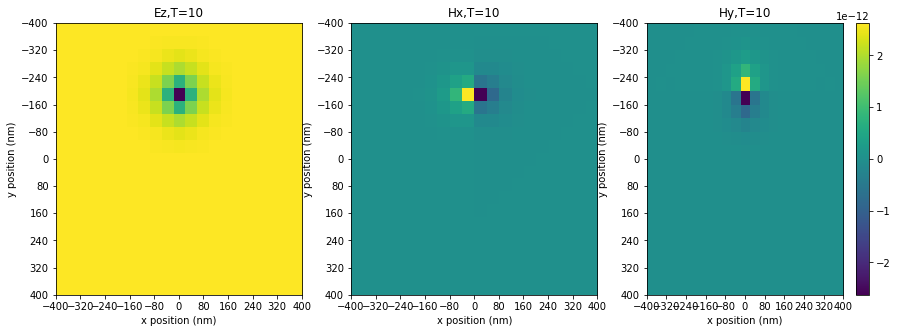

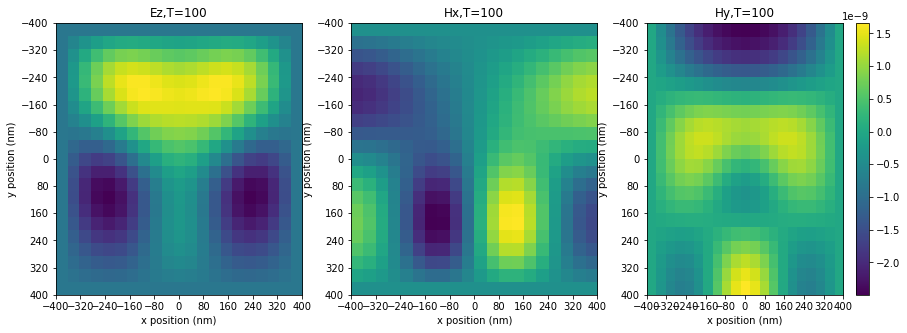

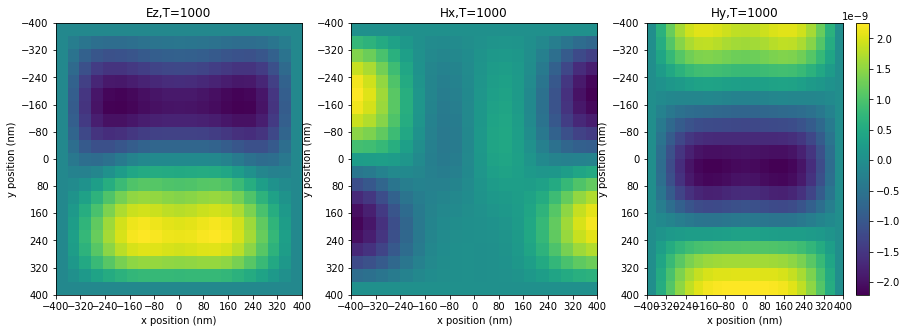

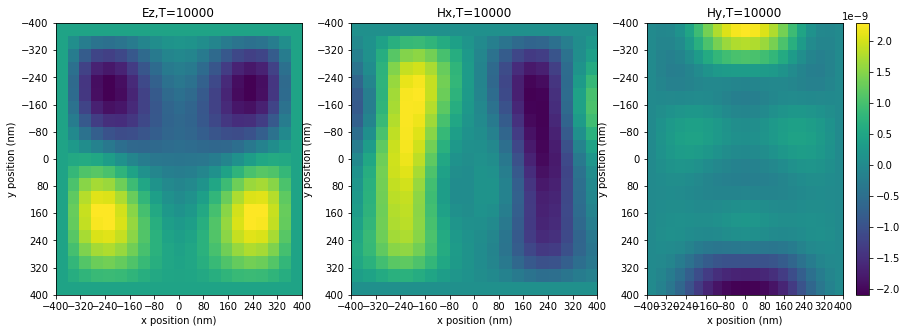

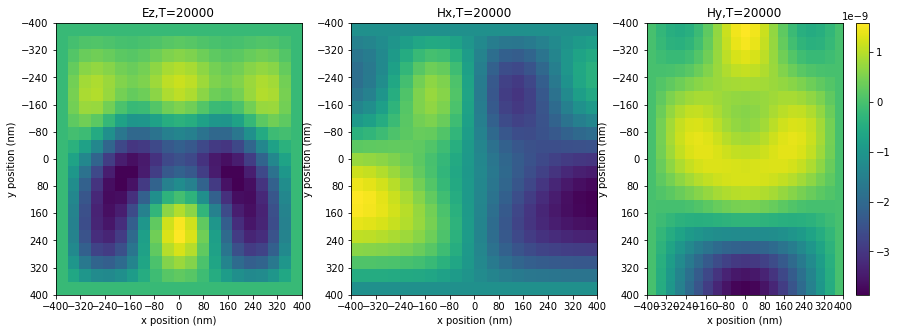

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
epsi0 = 1  # Permittivity of free space
mu0 = 1  # Permeability of free space
c0 = 1 / np.sqrt(epsi0 * mu0)  # Speed of light

lambda0 = 800e-9
lambdaL = 400e-9
lambdaU = 1200e-9

dy = dx = lambda0/20  # Space step
dt = dx /(np.sqrt(2)*c0)  # Time step

N_space = int(lambda0/dx)
# Domain definition
x = np.linspace(-1*400e-9, 400e-9, N_space+1)   #nm
y = np.linspace(-1*400e-9, 400e-9, N_space+1)   #nm

# Source parameters

omega = 2 * np.pi * c0 / lambda0
sigma = 2 * lambda0 / (omega * (lambdaU - lambdaL))

# Time steps for recording
T_max = [10,100,1000,10000,20000]

# Initialize fields
Ez = np.zeros((N_space+1,N_space+1))
Hx = np.zeros((N_space+1,N_space))
Hy = np.zeros((N_space,N_space+1))

Ez_record = np.zeros(T_max[0] + 1)


for T in T_max:
    E_record = []
    for t in range(1, T + 1):
        # Source
        J = np.zeros((N_space+1,N_space+1))
        J[np.argmin(np.abs(y - 200e-9)),int(N_space/2)] = np.exp(-((t * dt - 4 * sigma) / sigma) ** 2) * np.sin(omega * t * dt)

        # Update Ez, Hx, Hy field with PEC boundary conditions preserved

        # define coeffi. Because we set dx = dy, we can define this cofficient in this way
        E_co = dt/(epsi0*dx)
        H_co = dt/(mu0*dx)
        Ez[1:-1,:] = Ez[1:-1,:] + E_co*((Hy[1:,:]-Hy[:-1,:])) 
        Ez[:,1:-1] = Ez[:,1:-1] - H_co*((Hx[:,1:]-Hx[:,:-1]))
        Ez = Ez - dt/epsi0*J
        Hx -=  H_co*(Ez[:,1:]-Ez[:,:-1])
        Hy += H_co*(Ez[1:,:]-Ez[:-1,:])
        
        # PEC boundary condition
        Ez[0,:] = Ez[-1,:] = 0
        Ez[:,0] = Ez[:,-1] = 0
        Hx[0,:]=0
        Hx[-1,:]=0
        Hy[:,0]=0
        Hy[:,-1]=0
        
        E_record.append(Ez[np.argmin(np.abs(y + 200e-9)),int(N_space/2)])


    # Plotting at the last time step
    
    ticks = np.linspace(-400, 400, 11)

    plt.figure(figsize=(15,5))

# 对于Ez
    plt.subplot(131)
    plt.title("Ez,T="+str(t))
    plt.imshow(Ez, aspect='auto', extent=(-400, 400, -400, 400))
    plt.xlabel('x position (nm)')
    plt.ylabel('y position (nm)')
    plt.xticks(ticks)
    plt.yticks(ticks)
    plt.gca().invert_yaxis()

# 对于Hx
    plt.subplot(132)
    plt.title("Hx,T="+str(t))
    plt.imshow(Hx, aspect='auto', extent=(-400, 400, -400, 400))
    plt.xlabel('x position (nm)')
    plt.ylabel('y position (nm)')
    plt.xticks(ticks)
    plt.yticks(ticks)
    plt.gca().invert_yaxis()

# 对于Hy
    plt.subplot(133)
    plt.title("Hy,T="+str(t))
    img = plt.imshow(Hy, aspect='auto', extent=(-400, 400, -400, 400))
    plt.xlabel('x position (nm)')
    plt.ylabel('y position (nm)')
    plt.xticks(ticks)
    plt.yticks(ticks)
    plt.gca().invert_yaxis()
    plt.colorbar(img, shrink=1.0)




#### E_record

Text(0, 0.5, 'E (V/M)')

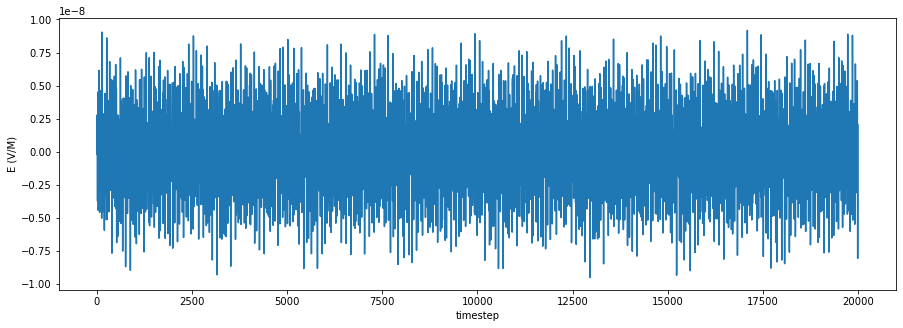

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(np.arange(0,len(E_record)),E_record)
plt.xlabel('timestep')
plt.ylabel('E (V/M)')

### (b) FFT

Text(0.5, 1.0, 'E_record spectrum')

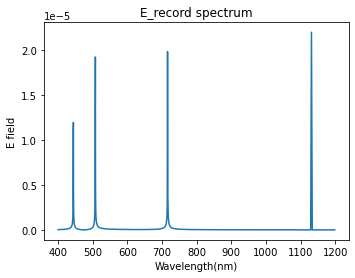

In [8]:
Efre=abs(np.fft.fft(E_record))
freq = np.fft.fftfreq(len(E_record), dt)

#sampling positive
Efreplus=(Efre[freq>=0])
freqplus =freq[freq>=0]


wavelength = c0*1e9/freqplus[1:]
wavelength = np.append(1,wavelength)

Ewave=Efreplus[(wavelength>=400) & (wavelength<=1200)]
waveplus=wavelength[(wavelength>=400) & (wavelength<=1200)]
# Efpos=np.abs(Ef[freq>=0])


plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(waveplus,Ewave)
plt.xlabel("Wavelength(nm)")
plt.ylabel("E field")
plt.title("E_record spectrum")


### find the corresponding wavelength

In [9]:
threshold = 1e-5
Targetwavelength = np.where(Ewave > threshold)[0]
Index_wave = []
for index in Targetwavelength:
    Index_wave.append(index)
Targetwave = []
for i in Index_wave:
    Targetwave.append(waveplus[i])
print(Targetwave)

[1131.370849898476, 716.0574999357443, 507.79661126502515, 444.37189705360413, 444.0230965064663]


![q2](./Theoretical_resutl_in_2D(finding_wavelength).png)

Text(0, 0.5, 'E_field')

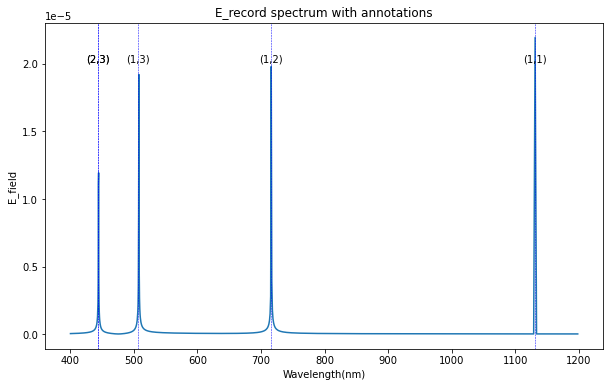

In [10]:

Lx, Ly = 800, 800  # in nm

# Function to calculate the wavelength based on m and n
def calculate_wavelength(m, n, Lx, Ly):
    return 2 / np.sqrt((m / Lx) ** 2 + (n / Ly) ** 2)

# Finding m and n for each wavelength in the array
results = []
tolerance = 2.0  # tolerance in nm

for target_wavelength in Targetwave:
    found = False
    for m in range(1,10):  # assuming m and n are within 0-9 for this example
        for n in range(1,10):
            calculated_wavelength = calculate_wavelength(m, n, Lx, Ly)
            if np.abs(calculated_wavelength - target_wavelength) < tolerance:
                results.append((m, n, calculated_wavelength))
                found = True
                break
        if found:
            break
results
plt.figure(figsize=(10, 6))
plt.title('E_record spectrum with annotations')
plt.plot(waveplus,Ewave)
# Plotting the data points as vertical lines and annotations
for point in results:
    (m, n, wavelength) = point
    plt.axvline(x=wavelength, color='blue', linestyle='--', linewidth=0.5)
    plt.text(wavelength, 2e-5, f'({m},{n})', ha='center', va='bottom')

# Set the labels
plt.xlabel('Wavelength(nm)')
plt.ylabel('E_field')


### (c) Single resonant mode of the cavity

Text(0, 0.5, 'E (V/M)')

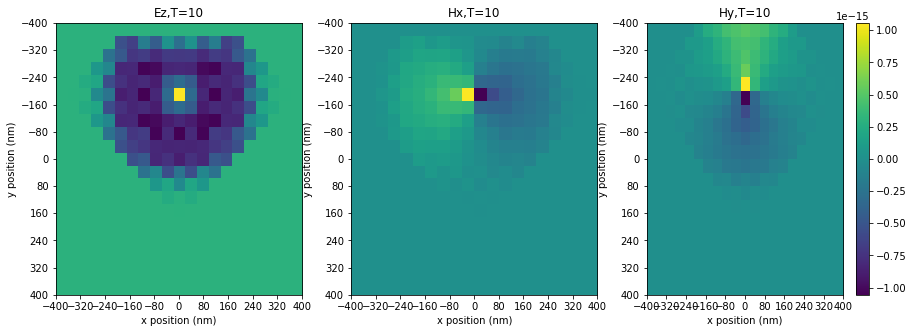

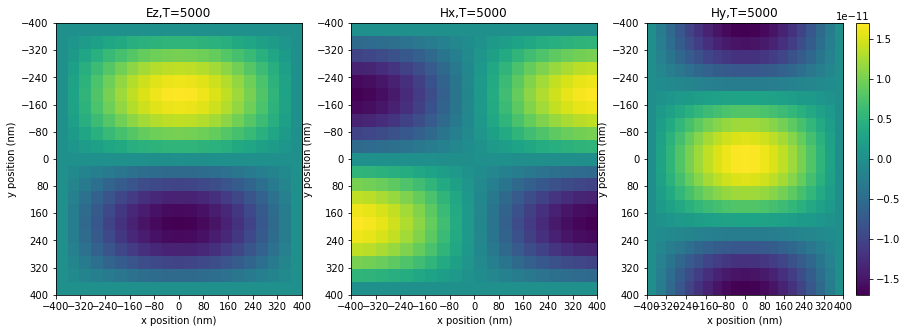

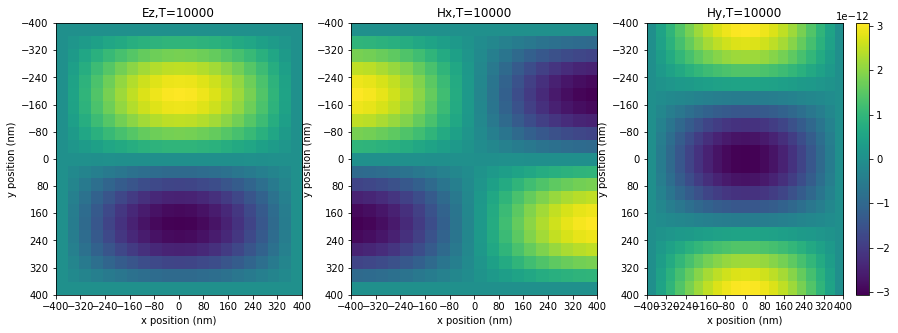

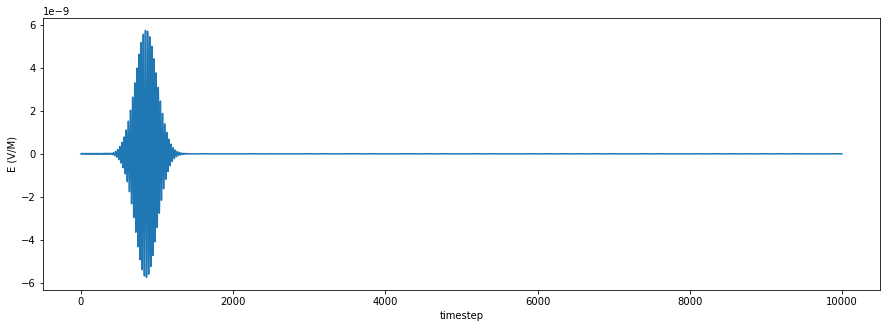

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
epsi0 = 1  # Permittivity of free space
mu0 = 1  # Permeability of free space
c0 = 1 / np.sqrt(epsi0 * mu0)  # Speed of light

lambda0 = 715e-9
lambdaL = 700e-9
lambdaU = 730e-9

dy = dx = lambda0/20  # Space step
dt = dx /(np.sqrt(2)*c0)  # Time step

N_space = int(lambda0/dx)
# Domain definition
x = np.linspace(-1*400e-9, 400e-9, N_space+1)   #nm
y = np.linspace(-1*400e-9, 400e-9, N_space+1)   #nm

# Source parameters

omega = 2 * np.pi * c0 / lambda0
sigma = 2 * lambda0 / (omega * (lambdaU - lambdaL))

# Time steps for recording
T_max = [10,5000,10000]

# Initialize fields
Ez = np.zeros((N_space+1,N_space+1))
Hx = np.zeros((N_space+1,N_space))
Hy = np.zeros((N_space,N_space+1))

Ez_record = np.zeros(T_max[0] + 1)


for T in T_max:
    E_record = []
    for t in range(1, T + 1):
        # Source
        J = np.zeros((N_space+1,N_space+1))
        J[np.argmin(np.abs(y - 200e-9)),int(N_space/2)] = np.exp(-((t * dt - 4 * sigma) / sigma) ** 2) * np.sin(omega * t * dt)

        # Update Ez, Hx, Hy field with PEC boundary conditions preserved

        # define coeffi. Because we set dx = dy, we can define this cofficient in this way
        E_co = dt/(epsi0*dx)
        H_co = dt/(mu0*dx)
        Ez[1:-1,:] = Ez[1:-1,:] + E_co*((Hy[1:,:]-Hy[:-1,:])) 
        Ez[:,1:-1] = Ez[:,1:-1] - H_co*((Hx[:,1:]-Hx[:,:-1]))
        Ez = Ez - dt/epsi0*J
        Hx -=  H_co*(Ez[:,1:]-Ez[:,:-1])
        Hy += H_co*(Ez[1:,:]-Ez[:-1,:])
        
        # PEC boundary condition
        Ez[0,:] = Ez[-1,:] = 0
        Ez[:,0] = Ez[:,-1] = 0
        Hx[0,:]=0
        Hx[-1,:]=0
        Hy[:,0]=0
        Hy[:,-1]=0
        
        E_record.append(Ez[np.argmin(np.abs(y + 200e-9)),int(N_space/2)])


    # Plotting at the last time step
    
    ticks = np.linspace(-400, 400, 11)

    plt.figure(figsize=(15,5))

# Ez
    plt.subplot(131)
    plt.title("Ez,T="+str(t))
    plt.imshow(Ez, aspect='auto', extent=(-400, 400, -400, 400))
    plt.xlabel('x position (nm)')
    plt.ylabel('y position (nm)')
    plt.xticks(ticks)
    plt.yticks(ticks)
    plt.gca().invert_yaxis()

# Hx
    plt.subplot(132)
    plt.title("Hx,T="+str(t))
    plt.imshow(Hx, aspect='auto', extent=(-400, 400, -400, 400))
    plt.xlabel('x position (nm)')
    plt.ylabel('y position (nm)')
    plt.xticks(ticks)
    plt.yticks(ticks)
    plt.gca().invert_yaxis()

# Hy
    plt.subplot(133)
    plt.title("Hy,T="+str(t))
    img = plt.imshow(Hy, aspect='auto', extent=(-400, 400, -400, 400))
    plt.xlabel('x position (nm)')
    plt.ylabel('y position (nm)')
    plt.xticks(ticks)
    plt.yticks(ticks)
    plt.gca().invert_yaxis()
    plt.colorbar(img, shrink=1.0)


plt.figure(figsize=(15, 5))
plt.plot(np.arange(0,len(E_record)),E_record)
plt.xlabel('timestep')
plt.ylabel('E (V/M)')